In [1]:
from osgeo import gdal
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tflearn
import random
import time
from zipfile import ZipFile
import io




In [11]:

driver = gdal.GetDriverByName('GTiff')
#filename = "Strassenlaerm_Nacht.tif"
filename = "Strassenlaerm_Tag.tif"
dataset = gdal.Open(filename)
band = dataset.GetRasterBand(1)

cols = dataset.RasterXSize
rows = dataset.RasterYSize

transform = dataset.GetGeoTransform()

xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = -transform[5]

data = band.ReadAsArray(0, 0, cols, rows)

print("{} {}".format(cols, rows))

34901 22101


In [3]:
# nico1, piero, nico2, violett
points_list = [(610370.68, 267213.20), (622109.64,258681.51), (609535.50,266231.44), (611425.14, 266458.84)]
for point in points_list:
    col = int((point[0] - xOrigin) / pixelWidth)
    row = int((yOrigin - point[1] ) / pixelHeight)

    print(row,col, data[row][col])
  

2879 12537 63
3732 13711 50
2977 12454 62
2954 12643 67


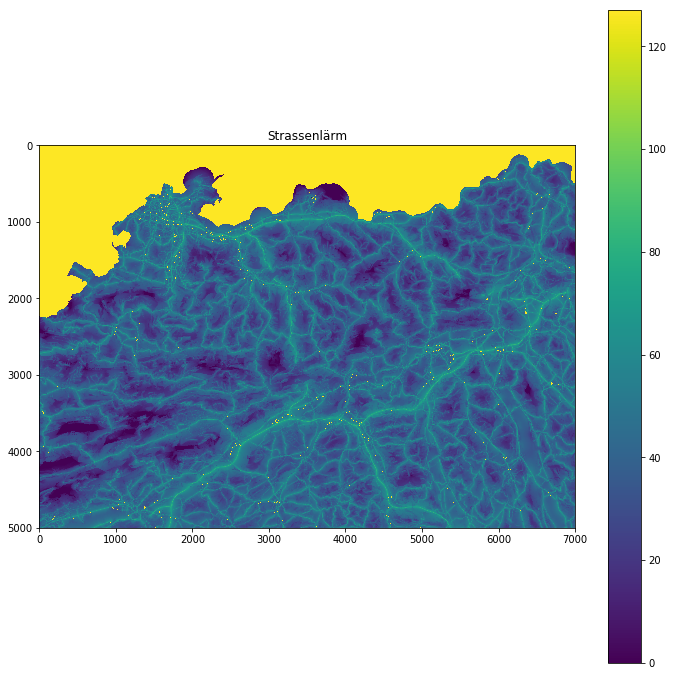

In [20]:

def colorMap(arr, size=12):
    arr = np.asarray(arr)
    
    fig = plt.figure(figsize=(size,size))
    ax = fig.add_subplot(111)
    ax.set_title('Strassenlärm')
    plt.imshow(arr)
    ax.set_aspect('equal')
    plt.colorbar(orientation='vertical')
    plt.show()

pixels = []

for row in range(2000, 7000):
  pixels.append([data[row][col] for col in range(11000, 18000)])

colorMap(pixels)


1


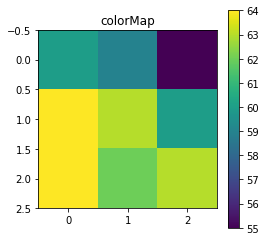

55
61.1111111111
---------------

3


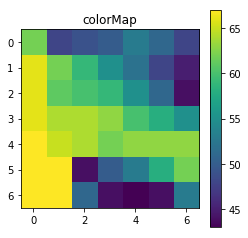

43
56.9591836735
---------------

5


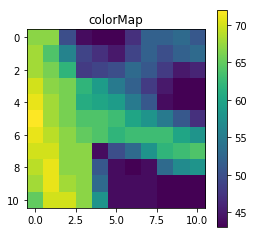

43
56.3223140496
---------------

7


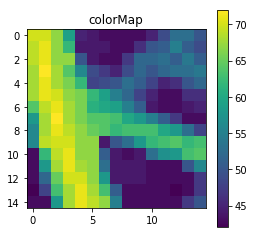

42
55.2977777778
---------------

9


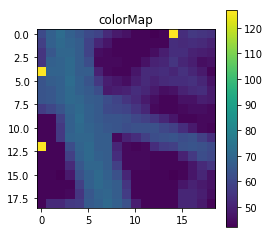

42
54.1117318436
---------------

11


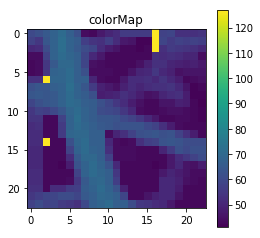

41
53.8492366412
---------------

13


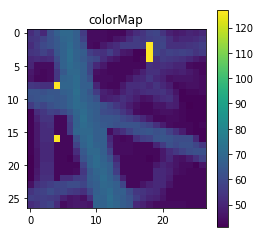

41
52.9806629834
---------------

15


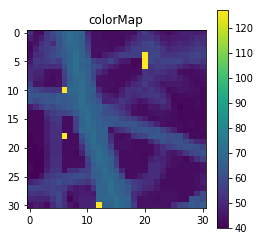

40
52.2178010471
---------------

17


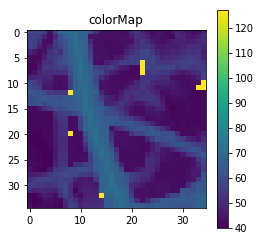

40
52.1578947368
---------------

19


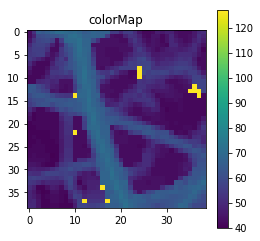

40
52.4297082228
---------------

1


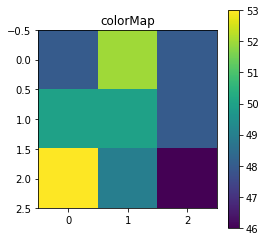

46
49.3333333333
---------------

3


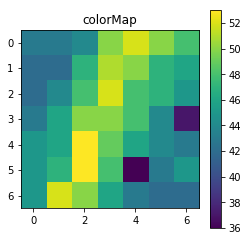

36
46.1632653061
---------------

5


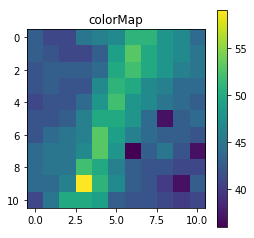

36
45.0247933884
---------------

7


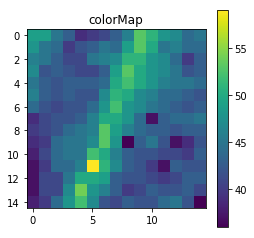

36
44.2711111111
---------------

9


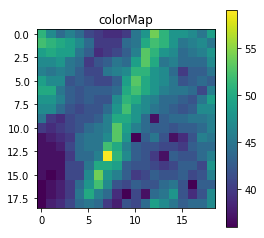

36
44.1689750693
---------------

11


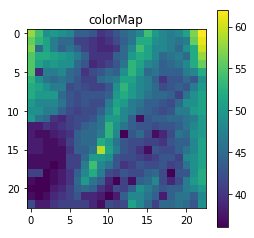

36
44.7844990548
---------------

13


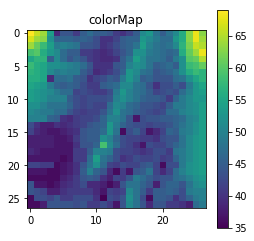

35
45.8971193416
---------------

15


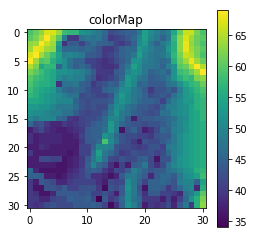

34
47.0665972945
---------------

17


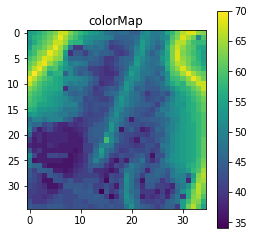

34
48.3836734694
---------------

19


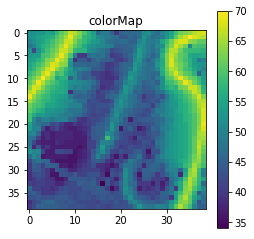

34
49.2991452991
---------------

1


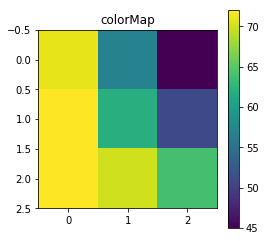

45
62.6666666667
---------------

3


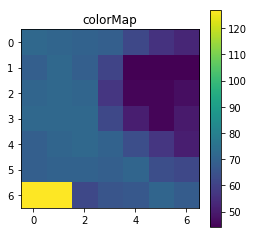

44
62.7872340426
---------------

5


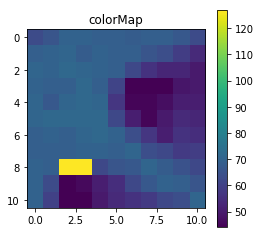

44
62.7058823529
---------------

7


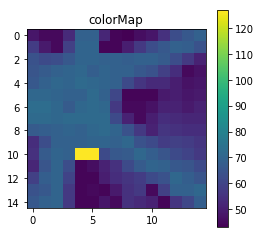

43
60.4753363229
---------------

9


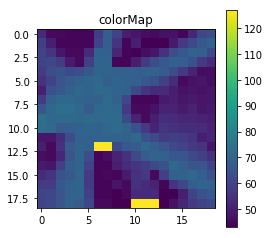

43
58.2865168539
---------------

11


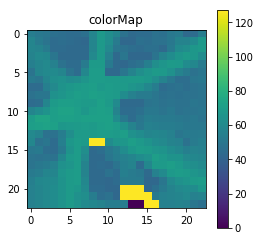

0
56.9749034749
---------------

13


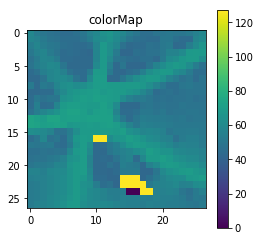

0
56.2674094708
---------------

15


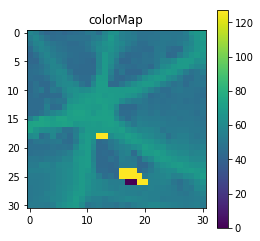

0
55.7
---------------

17


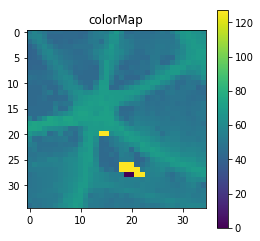

0
55.2067545305
---------------

19


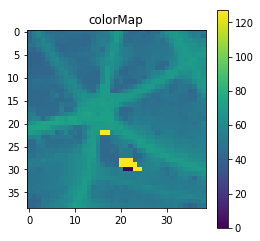

0
54.8973509934
---------------

1


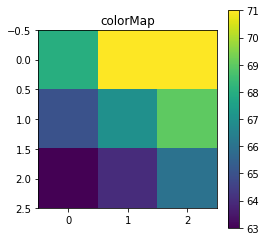

63
67.1111111111
---------------

3


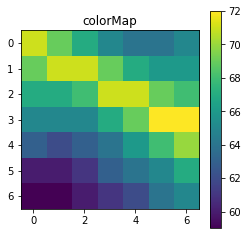

59
65.8367346939
---------------

5


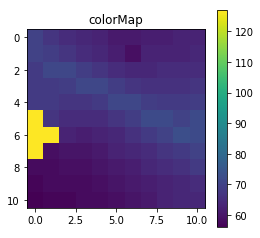

56
64.7008547009
---------------

7


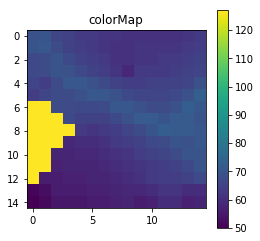

50
63.8894230769
---------------

9


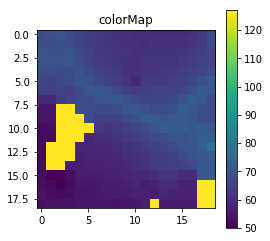

50
63.0658682635
---------------

11


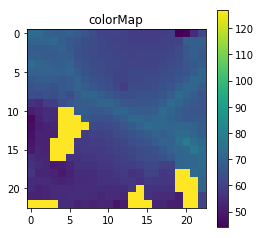

44
62.5523613963
---------------

13


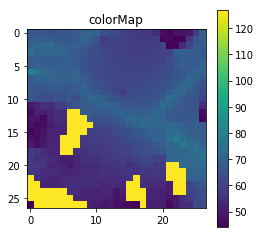

44
62.012066365
---------------

15


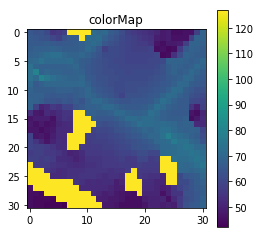

42
61.2773302647
---------------

17


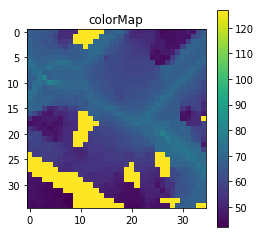

42
60.7144168962
---------------

19


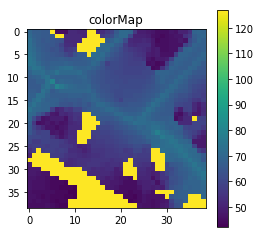

42
60.2906367041
---------------



In [8]:
num_pix = 5
for point in points_list:
    for num_pix in range(1, 20, 2):
        print(num_pix)
        matrix = []
        for x in range(-num_pix, num_pix+1):
            line = []
            for y in range(-num_pix, num_pix+1):

                col = int((point[0] - xOrigin) / pixelWidth) + y
                row = int((yOrigin - point[1] ) / pixelHeight) + x

                line.append(data[row][col])
            matrix.append(np.asarray(line))

        matrix = np.asarray(matrix)
        colorMap(matrix, 4)
        filtered = matrix.ravel()
        filtered = filtered[np.where(filtered < 127)]
        print(np.min(filtered))
        print(np.mean(filtered))
        print("---------------")
        print()

